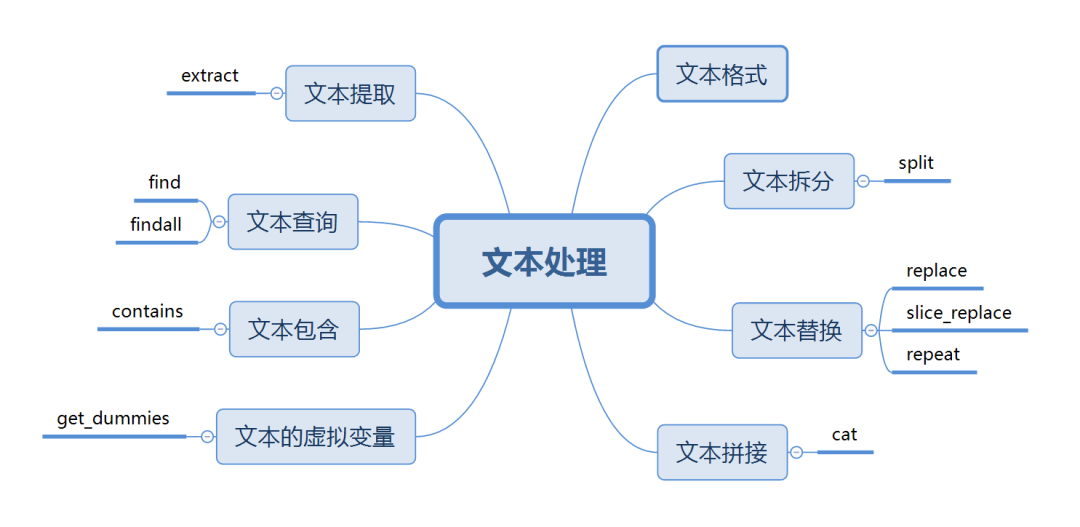

以下操作均基于下面的数据：

In [1]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'name':['jordon', 'MIKE', 'Kelvin', 'xiaoLi', 'qiqi','Amei'],
                   'Age':[18, 30, 45, 23, 45, 62],
                   'level':['high','Low','M','L','middle',np.nan],
                   'Email':['jordon@sohu.com','Mike@126.cn','KelvinChai@gmail.com','xiaoli@163.com',np.nan,'amei@qq.com']})
df

name  Age   level                 Email
0  jordon   18    high       jordon@sohu.com
1    MIKE   30     Low           Mike@126.cn
2  Kelvin   45       M  KelvinChai@gmail.com
3  xiaoLi   23       L        xiaoli@163.com
4    qiqi   45  middle                   NaN
5    Amei   62     NaN           amei@qq.com

# 1、文本格式

## 大小写变换

In [ ]:
# 字符全部变成小写
s.str.lower()
# 字符全部大写
s.str.upper()
# 每个单词首字母大写
s.str.title()
# 字符串第一个字母大写
s.str.capitalize()
# 大小写字母转换
s.str.swapcase()

上面用法都比较简单，不逐一举例，这里举一个对columns变成小写的例子。

In [2]:
df.columns.str.lower()

Index(['name', 'age', 'level', 'email'], dtype='object')

## 格式判断

下面均为判断操作，因此返回布尔值。

In [ ]:
s.str.isalpha # 是否为字母
s.str.isnumeric # 是否为数字0-9
s.str.isalnum # 是否由字母和数字组成
s.str.isupper # 是否为大写
s.str.islower # 是否为小写
s.str.isdigit # 是否为数字

## 对齐

In [ ]:
# 居中对齐，宽度为8，其余用’*’填充
s.str.center(8, fillchar='*')
# 左对齐，宽度为8，其余用’*’填充
s.str.ljust(8, fillchar='*')
# 右对齐，宽度为8，其余用’*’填充
s.str.rjust(8, fillchar='*')
# 自定义对齐方式，参数可调整宽度、对齐方向、填充字符
s.str.pad(width=8, side='both',fillchar='*')

In [3]:
# 举例
df.name.str.center(8, fillchar='*')

0    *jordon*
1    **MIKE**
2    *Kelvin*
3    *xiaoLi*
4    **qiqi**
5    **Amei**
Name: name, dtype: object

## 计数和编码

In [ ]:
s.str.count('b') # 字符串种包括指定字母的数量
s.str.len() # 字符串长度
s.str.encode('utf-8') # 字符编码
s.str.decode('utf-8') # 字符解码

# 2、文本拆分

通过使用split方法可以某个指定的字符作为分割点拆分文本。其中，expand参数可以让拆分的内容展开，形成单独的列，n参数可以指定拆分的位置来控制形成几列。

下面将email变量按照@进行拆分。

In [ ]:
# 使用方法
s.str.split('x', expand=True, n=1)

In [4]:
# 举例
df.Email.str.split('@')

0         [jordon, sohu.com]
1             [Mike, 126.cn]
2    [KelvinChai, gmail.com]
3          [xiaoli, 163.com]
4                        NaN
5             [amei, qq.com]
Name: Email, dtype: object

In [5]:
# expand可以让拆分的内容扩展成单独一列
df.Email.str.split('@',expand=True)

0          1
0      jordon   sohu.com
1        Mike     126.cn
2  KelvinChai  gmail.com
3      xiaoli    163.com
4         NaN        NaN
5        amei     qq.com

更复杂的拆分可以借助正则表达式，比如想同时通过@和.进行拆分，那么可以这样实现。

In [6]:
df.Email.str.split('\@|\.',expand=True)

0      1    2
0      jordon   sohu  com
1        Mike    126   cn
2  KelvinChai  gmail  com
3      xiaoli    163  com
4         NaN    NaN  NaN
5        amei     qq  com

# 3、文本替换

文本替换有几种方法：replace，slice_replace，repeat

## replace替换

replace方法是最常用的替换方法，参数如下：

- pal：为被替代的内容字符串，也可以为正则表达式
- repl：为新内容字符串，也可以是一个被调用的函数
- regex：用于设置是否支持正则，默认是True

In [7]:
# 将email种的com都替换为cn
df.Email.str.replace('com','cn')

0         jordon@sohu.cn
1            Mike@126.cn
2    KelvinChai@gmail.cn
3          xiaoli@163.cn
4                    NaN
5             amei@qq.cn
Name: Email, dtype: object

更复杂一点的，比如将旧内容写成正则表达式。

In [12]:
#将@之前的名字都替换成xxx
df.Email.str.replace('(.*?)@','xxx@', regex=True)

0     xxx@sohu.com
1       xxx@126.cn
2    xxx@gmail.com
3      xxx@163.com
4              NaN
5       xxx@qq.com
Name: Email, dtype: object

或者将新内容写成被调用的函数。

In [14]:
df.Email.str.replace('(.*?)@', lambda x:x.group().upper(), regex=True)

0         JORDON@sohu.com
1             MIKE@126.cn
2    KELVINCHAI@gmail.com
3          XIAOLI@163.com
4                     NaN
5             AMEI@qq.com
Name: Email, dtype: object

## 切片替换

slice_replace通过切片的方式实现替换，通过切片可以保留或者删除指定的字符，参数如下。

- start：起始位置
- stop：结束位置
- repl：要替换用的新内容

对start切片位置之后和stop切片位置之前进行替换，如果没有设置stop，那么start之后全部进行替换，同理如果没设置start，那么stop之前全部进行替换。

In [15]:
df.Email.str.slice_replace(start=1,stop=2,repl='XX')

0         jXXrdon@sohu.com
1             MXXke@126.cn
2    KXXlvinChai@gmail.com
3          xXXaoli@163.com
4                      NaN
5             aXXei@qq.com
Name: Email, dtype: object

## 重复替换

repeat可以实现重复替换的功能，参数repeats设置重复的次数。

In [16]:
df.name.str.repeat(repeats=2)

0    jordonjordon
1        MIKEMIKE
2    KelvinKelvin
3    xiaoLixiaoLi
4        qiqiqiqi
5        AmeiAmei
Name: name, dtype: object

# 4、文本拼接

文本拼接通过cat方法实现，参数：

- others: 需要拼接的序列，如果为None不设置，就会自动把当前序列拼接为一个字符串
- sep: 拼接用的分隔符
- na_rep: 默认不对空值处理，这里设置空值的替换字符。
- join: 拼接的方向，包括left, right, outer, inner，默认为left

主要有以下几种拼接方式。

## 1. 将单个序列拼接为一个完整字符串

如上所述，当没有设置ohters参数时，该方法会将当前序列合并为一个新的字符串。

In [17]:
df.name.str.cat()

'jordonMIKEKelvinxiaoLiqiqiAmei'

In [19]:
df.name.str.cat(sep='-')

'jordon-MIKE-Kelvin-xiaoLi-qiqi-Amei'

In [21]:
df.level.str.cat(sep='-', na_rep='*')

'high-Low-M-L-middle-*'

## 2. 拼接序列和其他类列表型对象为新的序列

下面先将name列和*列拼接，再将level列拼接，形成一个新的序列。

In [22]:
# str.cat多级连接实现多列拼接
df.name.str.cat(['*']*6).str.cat(df.level)

0    jordon*high
1       MIKE*Low
2       Kelvin*M
3       xiaoLi*L
4    qiqi*middle
5            NaN
Name: name, dtype: object

In [23]:
# 也可以直接多列拼接
df.name.str.cat([df.level,df.Email],na_rep='*')

0      jordonhighjordon@sohu.com
1             MIKELowMike@126.cn
2    KelvinMKelvinChai@gmail.com
3          xiaoLiLxiaoli@163.com
4                    qiqimiddle*
5               Amei*amei@qq.com
Name: name, dtype: object

将一个序列与多个对象拼接为一个新的序列

# 5、文本提取

文本提取主要通过extract来实现的。

extract参数：

- pat: 通过正则表达式实现一个提取的pattern
- flags: 正则库re中的标识，比如re.IGNORECASE
- expand: 当正则只提取一个内容时，如果expand=True会展开返回一个DataFrame，否则返回一个Series

In [24]:
# 提取email中的两个内容
df.Email.str.extract(pat='(.*?)@(.*).com')

0      1
0      jordon   sohu
1         NaN    NaN
2  KelvinChai  gmail
3      xiaoli    163
4         NaN    NaN
5        amei     qq

# 6、文本查询

通过find和findall两个方法实现。

find 参数很简单，直接输入要查询的字符串即可，返回在原字符串中的位置，没查询到结果返回-1。

In [25]:
df['@position'] = df.Email.str.find('@')
df[['Email','@position']]

Email  @position
0       jordon@sohu.com        6.0
1           Mike@126.cn        4.0
2  KelvinChai@gmail.com       10.0
3        xiaoli@163.com        6.0
4                   NaN        NaN
5           amei@qq.com        4.0

上面示例返回@在email变量中的位置。

另外一个查找方法是findall

findall参数：

- pat: 要查找的内容，支持正则表达式
- flag: 正则库re中的标识，比如re.IGNORECASE

findall和find的区别是支持正则表达式，并返回具体内容。这个方法有点类似extract，也可以用于提取，但不如extract方便。

In [26]:
df.Email.str.findall('(.*?)@(.*).com')

0         [(jordon, sohu)]
1                       []
2    [(KelvinChai, gmail)]
3          [(xiaoli, 163)]
4                      NaN
5             [(amei, qq)]
Name: Email, dtype: object

上面示例返回正则查找的两个部分，并以元组列表的形式出现。

# 7、文本包含

文本包含通过contains方法实现，返回布尔值，一般和loc查询功能配合使用，参数：

- pat: 匹配字符串，支持正则表达式
- case: 是否区分大小写，True表示区别
- flags: 正则库re中的标识，比如re.IGNORECASE
- na: 对缺失值填充
- regex: 是否支持正则，默认True支持

In [28]:
df.Email

0         jordon@sohu.com
1             Mike@126.cn
2    KelvinChai@gmail.com
3          xiaoli@163.com
4                     NaN
5             amei@qq.com
Name: Email, dtype: object

In [27]:
df.Email.str.contains('jordon|com',na='*')

0     True
1    False
2     True
3     True
4        *
5     True
Name: Email, dtype: object

In [29]:
df.loc[df.Email.str.contains('jordon|com', na=False)]

name  Age level                 Email  @position
0  jordon   18  high       jordon@sohu.com        6.0
2  Kelvin   45     M  KelvinChai@gmail.com       10.0
3  xiaoLi   23     L        xiaoli@163.com        6.0
5    Amei   62   NaN           amei@qq.com        4.0

这里需要注意一下，如果和loc配合使用，注意不能有缺失值，否则会报错。可以通过设置na=False忽略缺失值完成查询。

# 8、文本的虚拟变量

get_dummies可以将一个列变量自动生成虚拟变量（哑变量），这种方法在特征衍生中经常使用。

In [30]:
df.name.str.get_dummies()

Amei  Kelvin  MIKE  jordon  qiqi  xiaoLi
0     0       0     0       1     0       0
1     0       0     1       0     0       0
2     0       1     0       0     0       0
3     0       0     0       0     0       1
4     0       0     0       0     1       0
5     1       0     0       0     0       0